In [87]:
import torch
from torch import nn, optim
from matplotlib import pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [88]:
batch_size = 12

train_data = datasets.MNIST('C:/Users/minkyeong/Desktop/DeepLearning', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('C:/Users/minkyeong/Desktop/DeepLearning', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [89]:
class MLP(nn.Module):
    def __init__(self, layers):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10  
        
        layers_list = []
        start_dim = 512
        for i in range(layers):
            if i == 0:
                layers_list.append(nn.Linear(self.in_dim, start_dim))
                layers_list.append(nn.ReLU())
            elif i == layers-1:
                layers_list.append(nn.Linear(start_dim, self.out_dim))
            else:
                layers_list.append(nn.Linear(start_dim, start_dim//2))
                layers_list.append(nn.ReLU())
                start_dim //= 2
        
        self.linears = nn.ModuleList(layers_list)
        self.log_softmax = nn.LogSoftmax()
    def forward(self, x):
        x = x.view(-1, self.in_dim)
        for i, l in enumerate(self.linears):
            x = l(x)
        return x

In [90]:
accuracy = []

for depth in range(2,6): # 2, 3, 4, 5 layers
    model = MLP(depth)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.01)
    
    for epoch in range(10):
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()
    
    accuracy.append(n_correct/n_predict)
    print(f"{n_correct}/{n_predict}")
    print(f"Accuracy: {n_correct/n_predict:.3f}")

9705/10000
Accuracy: 0.970
9768/10000
Accuracy: 0.977
9777/10000
Accuracy: 0.978
9764/10000
Accuracy: 0.976


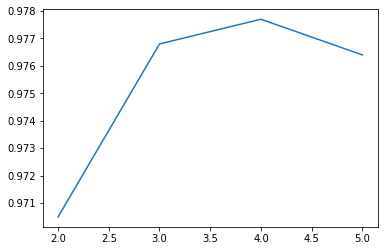

In [91]:
plt.plot([i for i in range(2,6)], accuracy)